# Tratamento de Dados

<p>Neste exemplo estarei realizando uma analise dos dados e realizando um tratamento de dados em algumas variávels que necessitam de tratamento. <br>
<p>Realizarei um tratamento dos dados visando a preparação para uma futura criação de um modelo preditivo de machine learning.

In [2]:
# A primeira coisa que temos que fazer é importar os pacotes que iremos utilizar.

# Pandas: Possui inúmeras funções e comandos para importar arquivos, analisar dados, tratar dados, etc.
import pandas as pd

# Matplotlib: Possui uma série de funções e comandos para exibição de gráficos
import matplotlib.pyplot as plt

# Seaborn: Possui uma série de funções e comandos para exibição de gráficos (Visualizações mais robustas do que o Matplotlib)
import seaborn as sns

# Numpy: Possui uma série de funções e comandos para trabalharmos com números de forma em geral(formatação, calculos, etc)
import numpy as np

# Warnings: Possui detalhes sobre os avisos e alertas que aparecem, porém podemos utiliza-lo também para que os alertas de
# uturas atualizações e metodos depreciados não sejam exibidos
import warnings
warnings.filterwarnings("ignore") 

# Locale: Utilizado para formatação de datas, valores, dias de acordo com a região que queremos.
import locale

In [4]:
# Comando para exibir todas colunas do arquivo

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# Comando utilizado para carregar o arquivo e armazena-lo como um DataFrame do Pandas

df_dados = pd.read_excel("dados.xlsx")

In [8]:
# Comando utilizado para verificar a quantidade de linhas e colunas do arquivo
# Colunas também são chamadas de variáveis.

df_dados.shape

(986, 10)

In [12]:
# Comando utilizado para verificar as linhas iniciais do DataFrame

df_dados.head()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000,IMPORTADO
2,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,900000,IMPORTADO
3,10/1/2020,FERRARI,3.0,12,1400,360,640,AUTOMATICO,900000,IMPORTADO
4,10/1/2020,ASTON MARTIN,3.5,10,1600,360,620,AUTOMATICO,900000,IMPORTADO


In [14]:
# Comando utilizado para verificar as linhas finais do DataFrame

df_dados.tail()

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
981,10/12/2021,HONDA FIT,12.0,4,1700,200,116,AUTOMATICO,120000,NACIONAL
982,10/12/2021,PALIO,11.0,4,1700,200,118,MANUAL,60000,NACIONAL
983,10/12/2021,UNO,13.5,4,1700,200,118,MANUAL,48000,NACIONAL
984,10/12/2021,MOBI,14.0,4,1700,200,118,MANUAL,42000,NACIONAL
985,10/12/2021,PASSAT,8.0,6,1800,200,118,MANUAL,200000,IMPORTADO


In [16]:
# Avaliar o período dos dados coletados

inicio = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.min()
fim = pd.to_datetime(df_dados['DATA_VENDA']).dt.date.max()
print('Período dos dados - De:', inicio, 'Até:',fim)

Período dos dados - De: 2020-10-01 Até: 2021-10-12


In [18]:
# Comando utilizado para verificar informações sobre os dados(Tipo de variáveis, Variáveis, Quantidade de registros, etc)

# Neste caso a variavel DATA_VENDA deve ser do tipo Date e a variavel VALOR do tipo Float. Precisamos tratar essas variáveis.

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    object 
 9   CATEGORIA                986 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 77.2+ KB


- Podemos pensar do porquê o campo VALOR está como objeto. Provavelmente o que pode ter acontecido é que na base de dados, em algum momento algum campo pode ter sido digitado errado e o campo que era para ter só números pode ter tido algum erro e aparecido uma letra. Como o python, analisando isso, não conseguiu transformar tudo para Float, ele transformou em um objeto, que no caso é uma string.

In [24]:
# Dessa forma podemos agrupar os valores e identificar se há algum valor discrepante.
# Observe que há um valor que foi inserido como "SEM VALOR"

df_dados.groupby(['VALOR']).size()

VALOR
18000         48
28000         42
30000         24
35000         42
40000         30
42000         66
48000         66
60000         66
85000         36
110000        24
120000        66
150000        36
200000        65
220000        36
280000        66
400000        36
800000        66
900000       168
50000000       2
SEM VALOR      1
dtype: int64

In [26]:
# Aqui poderíamos resolver de duas formas.

# A primeira forma seria excluir todo o registro, mas estariamos perdendo dados.
# df_dados.drop(df_dados.loc[df_dados['VALOR']=='SEM VALOR'].index, inplace=True)


# A segunda forma seria verificar o valor médio ou da mediana deste modelo e substituir a palavra SEM VALOR para um valor médio.

df_dados.loc[df_dados['VALOR'] == 'SEM VALOR']


,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
45,10/3/2020,PASSAT,8.0,6,1800,200,118,MANUAL,SEM VALOR,IMPORTADO


- Como verificamos e percebemos que temos 986 linhas e esse problema só aconteceu com apenas 1 linha, o ideal seria apagar esse dado, mas se fossem muitas linhas, provavelmente isso não seria a opção ideal porque isso nos faria perder informações.

In [29]:
# Agora substituimos a palavra SEM VALOR pelo valor ZERO

df_dados.loc[(df_dados['VALOR'] == 'SEM VALOR'), 'VALOR'] = 0

In [31]:
# Em seguida convertemos o campo em float
# Isso porque temos que lembrar que antes estava essa coluna como objeto.

df_dados['VALOR'] = df_dados['VALOR'].astype(np.float64)

In [37]:
# Aqui podemos perceber que o campo "SEM VALOR" não existe mais.

df_dados.groupby(['VALOR']).size()

VALOR
0.0             1
18000.0        48
28000.0        42
30000.0        24
35000.0        42
40000.0        30
42000.0        66
48000.0        66
60000.0        66
85000.0        36
110000.0       24
120000.0       66
150000.0       36
200000.0       65
220000.0       36
280000.0       66
400000.0       36
800000.0       66
900000.0      168
50000000.0      2
dtype: int64

In [41]:
# Aqui podemos ver que o tipo do campo VALOR agora está como FLOAT64.

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 984 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    float64
 9   CATEGORIA                986 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 77.2+ KB


In [55]:
# Verificamos os valores medianos da coluna modelo para substituir o valor ZERO

df_passat = df_dados.loc[df_dados['MODELO'] == 'PASSAT'].select_dtypes(include=['number'])
medianas_passat = df_passat.median()
print(medianas_passat)

KM-LITRO                        8.0
CILINDROS                       6.0
PESO(KG)                     1800.0
VELOCIDADE_MAXIMA(KM/H)       200.0
CAVALOS                       118.0
VALOR                      200000.0
dtype: float64


In [59]:
# Aqui atualizamos o valor conforme a mediana daquele modelo
# Onde a coluna VALOR é igual a 0, nós substituimos por 200000.

df_dados.loc[(df_dados['VALOR'] == 200000), 'VALOR'] = 0

- Temos que lembrar que nós só fizemos essa mudança para o 0, precisamos fazer isso por conta de que anteriormente a coluna estava como objeto, então tivemos que passar para float primeiro.

In [64]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamado de valores missing ou NAN (Not Available)
# Podemos perceber que na coluna KM-LITRO, apresenta dois registros com valores missing ou NAN.  

df_dados.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   2
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

In [68]:
# Agora iremos tratar os valores missing, ou seja, os registros que não possuem valores.
# Uma forma bem mais simples de tratarmos o dado é utilizar direto a função FILLNA preenchendo os valores em branco 
# com a mediana.

df_dados['KM-LITRO'] = df_dados['KM-LITRO'].fillna((df_dados['KM-LITRO'].median()))

In [72]:
# Observe agora que não temos mais nenhum valor em branco

df_dados.isnull().sum()

DATA_VENDA                 0
MODELO                     0
KM-LITRO                   0
CILINDROS                  0
PESO(KG)                   0
VELOCIDADE_MAXIMA(KM/H)    0
CAVALOS                    0
TRANSMISSAO                0
VALOR                      0
CATEGORIA                  0
dtype: int64

In [78]:
# Vamos avaliar novamente os tipos das variaveis

df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DATA_VENDA               986 non-null    object 
 1   MODELO                   986 non-null    object 
 2   KM-LITRO                 986 non-null    float64
 3   CILINDROS                986 non-null    int64  
 4   PESO(KG)                 986 non-null    int64  
 5   VELOCIDADE_MAXIMA(KM/H)  986 non-null    int64  
 6   CAVALOS                  986 non-null    int64  
 7   TRANSMISSAO              986 non-null    object 
 8   VALOR                    986 non-null    float64
 9   CATEGORIA                986 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 77.2+ KB


In [76]:
# Agora iremos avaliar os outliers das colunas que são númericas
# OUTLIERS são valores discrepantes que estão bem acima ou bem abaixo dos outros valores

# Vamos carregar em uma lista as variaveis que são do tipo INT64 E FLOAT64
variaveis_numericas = []
for i in df_dados.columns[0:48].tolist():
        if df_dados.dtypes[i] == 'int64' or df_dados.dtypes[i] == 'float64':            
            print(i, ':' , df_dados.dtypes[i]) 
            variaveis_numericas.append(i)

KM-LITRO : float64
CILINDROS : int64
PESO(KG) : int64
VELOCIDADE_MAXIMA(KM/H) : int64
CAVALOS : int64
VALOR : float64


In [80]:
# Vamos observar a lista de variáveis e avaliar se nestas variáveis temos outliers através de um boxplot

variaveis_numericas

['KM-LITRO',
 'CILINDROS',
 'PESO(KG)',
 'VELOCIDADE_MAXIMA(KM/H)',
 'CAVALOS',
 'VALOR']

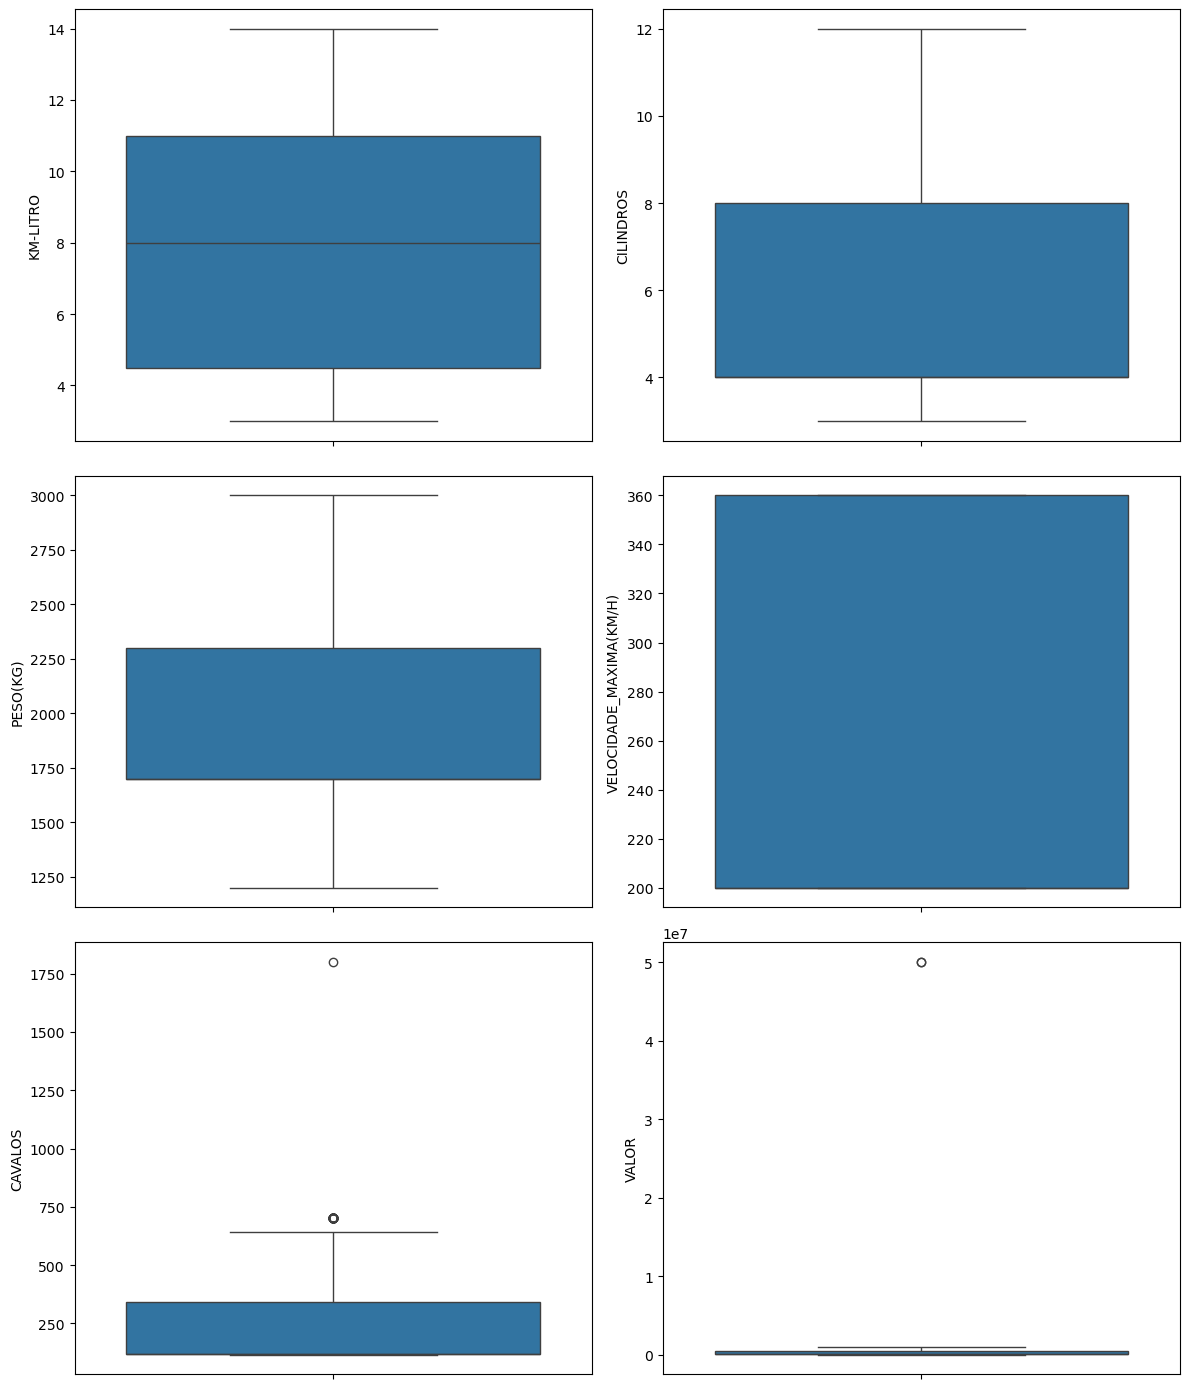

In [86]:
# Com este comando irei exibir todos gráficos de todas colunas de uma vez só para facilitar nossa analise.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()


# Boxplots
# Boxplot é utilizado para avaliar e comparar o formato, tendência central e variabilidade de distribuições de amostra, 
# e para procurar por outliers. Por padrão, um boxplot demonstra a mediana, os quartis, 
# o intervalo interquartil(IQR) e outliers para cada variável. 

# Outlier são valores que estão bem discrepantes dentro do conjunto de dados, podem ser para mais ou para menos. 
# Observe nos DOIS ULTIMOS boxplot que há os pontinhos acima das linhas. Esses valores são outliers

In [84]:
# Agora já sei que tenho OUTLIERS nas variáveis CAVALOS e VALOR. Vou olhar quais são esses outliers para avaliar
# como irei trata-los.

# Como no boxplot acima mostra que o maior número de cavalos está em torno de 700, então irei listar os casos acima de 700
# Observe que após listar só tenho um registro com OUTLIER.

df_dados.loc[df_dados['CAVALOS'] > 700]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
11,10/1/2020,CORSA,9.0,4,1900,200,1800,MANUAL,35000.0,NACIONAL


In [88]:
# Nesse exemplo vou excluir o registro todo.

df_dados.drop(df_dados.loc[df_dados['CAVALOS'] == 1800].index, inplace=True)

In [90]:
# Agora para a variavel VALOR vamos listar os valores maiores que 900.000
# Observe que temos dois registros considerados outlier, ou seja, o valor está muito acima do normal.

# Neste caso vamos substituir os valores pelo valor médio do modelo LAMBORGUINI.

df_dados.loc[df_dados['VALOR'] > 900000]

,DATA_VENDA,MODELO,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,TRANSMISSAO,VALOR,CATEGORIA
0,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO
1,10/1/2020,LABORGUINI,3.0,12,1200,360,700,AUTOMATICO,50000000.0,IMPORTADO


In [94]:
# Vamos identificar o valor mediana do modelo LAMBORGUINI

df_lamb = df_dados.loc[df_dados['MODELO'] == 'LABORGUINI'].select_dtypes(include=['number'])
medianas_lamb = df_lamb.median()
print(medianas_lamb)

KM-LITRO                        3.0
CILINDROS                      12.0
PESO(KG)                     1200.0
VELOCIDADE_MAXIMA(KM/H)       360.0
CAVALOS                       700.0
VALOR                      900000.0
dtype: float64


In [96]:
# Aqui atualizamos o valor conforme a mediana daquele modelo

df_dados.loc[(df_dados['VALOR'] > 900000), 'VALOR'] = 900000

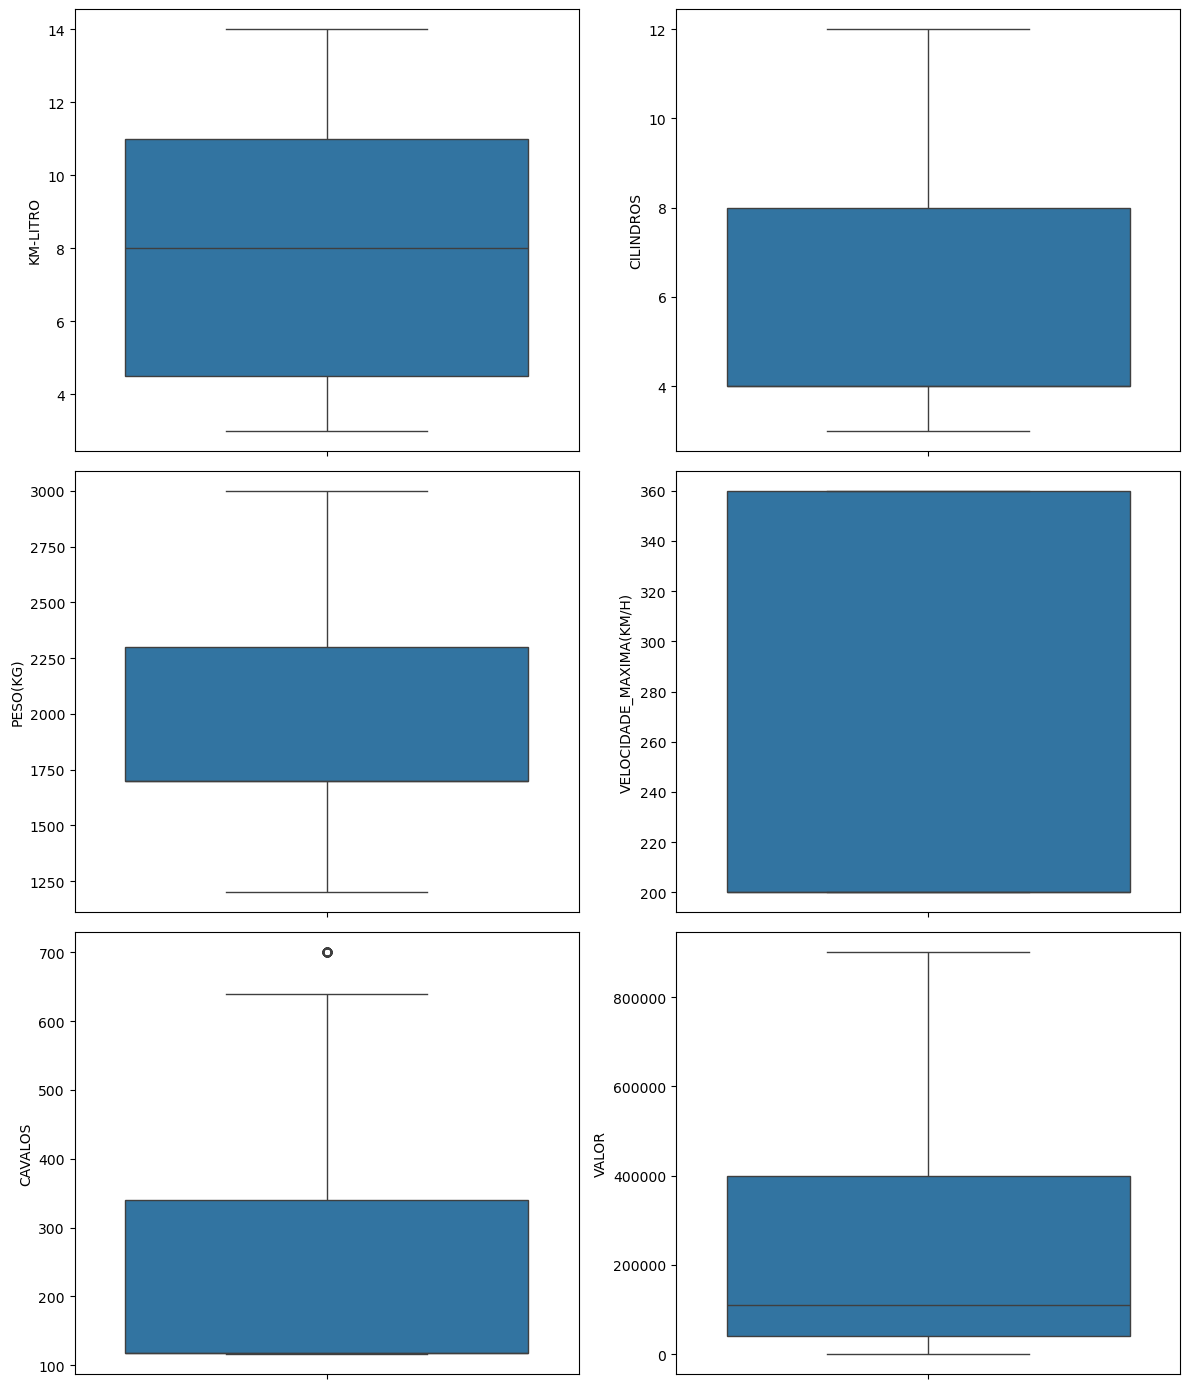

In [98]:
# Vamos avaliar novamente os boxplot e verificar se ficou algum OUTLIER
# Observe que na coluna cavalos de potencia ainda possuem alguns OUTLIERS porém nesse caso, olhando para o modelos dos carros
# podemos observar que realmente é a potencia deles. Nesse caso podemos mante-los.

# Aqui definimos o tamanho da tela para exibição dos gráficos
plt.rcParams["figure.figsize"] = [12.00, 14.00]
plt.rcParams["figure.autolayout"] = True

# Aqui definimos em quantas linhas e colunas queremos exibir os gráficos
f, axes = plt.subplots(3, 2) #3 linhas e 2 colunas

linha = 0
coluna = 0

for i in variaveis_numericas:
    sns.boxplot(data = df_dados, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

# Engenharia de Atributos
<p> A engenharia de atributos em resumo utilizarmos uma variavel existente e extrairmos mais informações dessa variável, podendo gerar novas variáveis para analise a partir desta variável existente.<br>
<p> No exemplo abaixo iremos utilizar a variavel DATA_VENDA e criar variaveis como Ano, Mês e Dia    

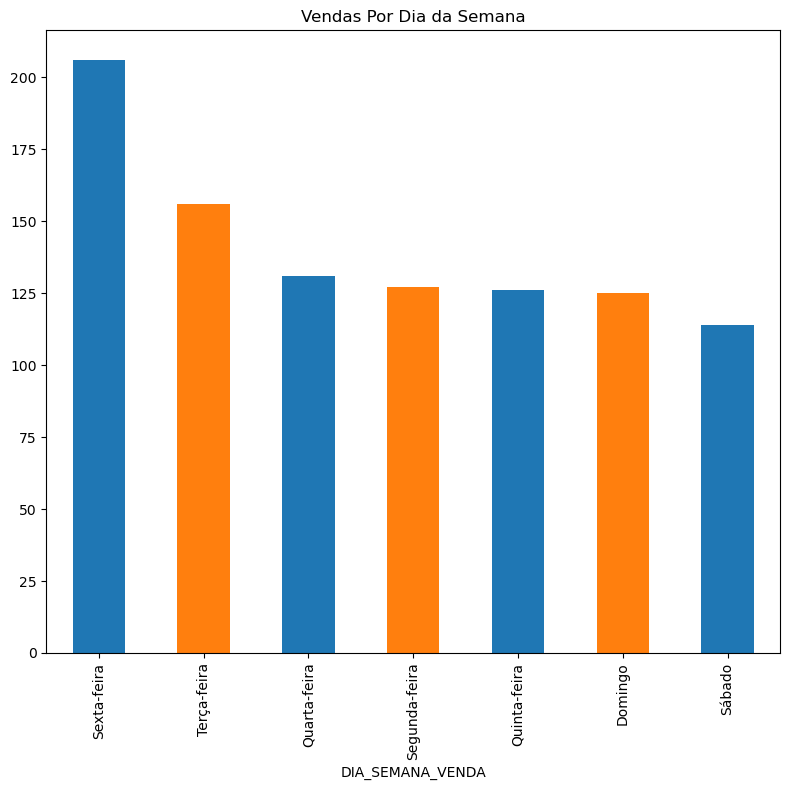

In [100]:
# Agora vamos tratar a variavel DATA_VENDA
# Aqui iremos fazer um tratamento para transformar o campo para o tipo DATE e também incluirmos novas variáveis a partir da data
# Vamos incluir as variaveis separadas, ANO, MES e DIA
# Vamos também incluir a variavel DIA_SEMANA e avaliarmos qual dia da semana temos mais vendas.

locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

df_dados['DATA_VENDA'] =  pd.to_datetime(df_dados['DATA_VENDA'], format='%d/%m/%Y')
df_dados['DATA_VENDA'] = df_dados['DATA_VENDA'].dt.date
df_dados['ANO_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).year
df_dados['MES_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).month
df_dados['DIA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day
df_dados['DIA_SEMANA_VENDA'] = pd.DatetimeIndex(df_dados['DATA_VENDA']).day_name(locale = 'pt_BR.utf8')


plt.rcParams["figure.figsize"] = [8.00, 8.00]
plt.rcParams["figure.autolayout"] = True
df_dados.DIA_SEMANA_VENDA.value_counts().plot(kind='bar', title='Vendas Por Dia da Semana',color = ['#1F77B4', '#FF7F0E']);


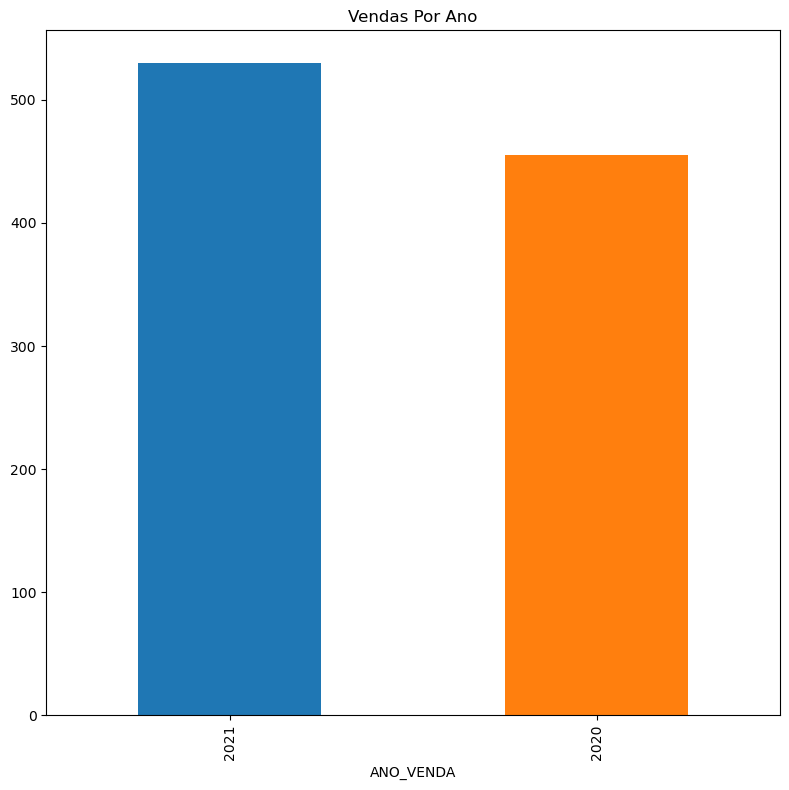

In [102]:
# Também podemos observar as vendas por ano

df_dados.ANO_VENDA.value_counts().plot(kind='bar', title='Vendas Por Ano',color = ['#1F77B4', '#FF7F0E']);

# Variaveis Dummys ou One Hot Encoding
<p> Quando estamos fazendo o tratamento dos dados para criação de um modelo de Machine Learning ou IA precisamos deixar todos os dados como números.
<p> Para este processo utilizamos variaveis Dummys ou também as conhecidas como One Hot Encoding

In [106]:
# Antes de gerar as variaveis dummys/one hot encoding vamos excluir as variaveis que não precisaremos mais.
# Neste caso vamos excluir a variavel DATA_VENDA, pois já geramos as variaveis separadas de ANO, MES e DIA
df_dados.drop('DATA_VENDA', axis=1, inplace=True)

In [108]:
# Convert os campos categoricos para ONE HOT ENCODING
# A imagem abaixo explica de forma simples esse tratamento

df_dados = pd.get_dummies(df_dados)

In [110]:
df_dados.head()

,KM-LITRO,CILINDROS,PESO(KG),VELOCIDADE_MAXIMA(KM/H),CAVALOS,VALOR,ANO_VENDA,MES_VENDA,DIA_VENDA,MODELO_ASTON MARTIN,MODELO_BMW X1,MODELO_BMW X5,MODELO_COROLLA,MODELO_CORSA,MODELO_CRETA,MODELO_FERRARI,MODELO_GOL,MODELO_HB20,MODELO_HONDA FIT,MODELO_JEEP COMPASS,MODELO_JEEP RENEGADE,MODELO_LABORGUINI,MODELO_MERCEDES SL80,MODELO_MOBI,MODELO_PAJERO,MODELO_PALIO,MODELO_PARATI,MODELO_PASSAT,MODELO_SAVEIRO,MODELO_UNO,MODELO_VECTRA,TRANSMISSAO_AUTOMATICO,TRANSMISSAO_MANUAL,CATEGORIA_IMPORTADO,CATEGORIA_NACIONAL,DIA_SEMANA_VENDA_Domingo,DIA_SEMANA_VENDA_Quarta-feira,DIA_SEMANA_VENDA_Quinta-feira,DIA_SEMANA_VENDA_Segunda-feira,DIA_SEMANA_VENDA_Sexta-feira,DIA_SEMANA_VENDA_Sábado,DIA_SEMANA_VENDA_Terça-feira
0,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
1,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
2,3.0,12,1200,360,700,900000.0,2020,1,10,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
3,3.0,12,1400,360,640,900000.0,2020,1,10,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False
4,3.5,10,1600,360,620,900000.0,2020,1,10,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,False,False


In [112]:
# Pronto, agora já temos nosso conjunto de dados tratados.
# Vamos salvar esse conjunto de dados com todos tratamentos.
df_dados.to_excel('dados_com_tratamento.xlsx', index = False)

As variáveis dummy (ou one-hot encoding) são uma técnica essencial em ciência de dados e machine learning para transformar variáveis categóricas (não numéricas) em um formato que algoritmos possam entender. 